In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.metrics 
import time
import os
from datetime import date
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew



In [2]:
data_raw=pd.read_csv("AmesHousing.csv",  delimiter=',')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
data_raw.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<AxesSubplot: >

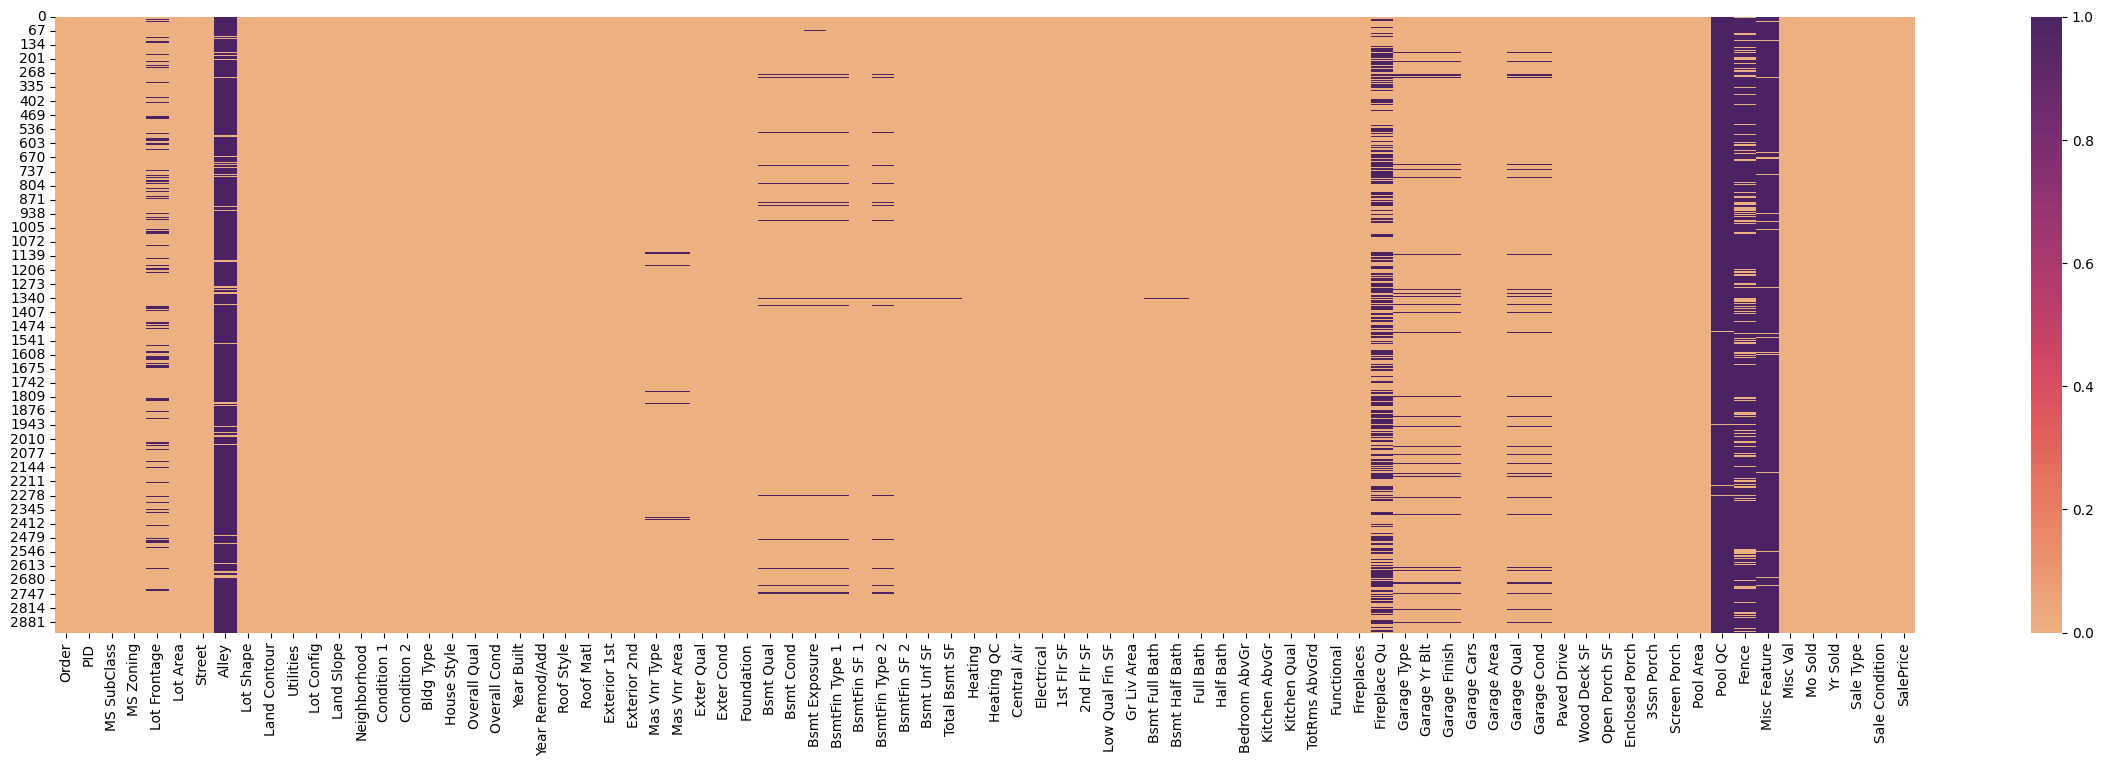

In [4]:
plt.figure(figsize=(30,8))
sb.heatmap(data_raw.isnull(), cmap='flare')
# null count heat map raw data

In [5]:
count = data_raw.isnull().sum().sort_values(ascending=False)
per = (data_raw.isnull().sum() / data_raw.isnull().count()*100).sort_values(ascending=False)
null_data = pd.concat([count, per], axis=1, keys=['Count', 'Percent'])
print(null_data.head(15))

                Count    Percent
Pool QC          2917  99.556314
Misc Feature     2824  96.382253
Alley            2732  93.242321
Fence            2358  80.477816
Fireplace Qu     1422  48.532423
Lot Frontage      490  16.723549
Garage Cond       159   5.426621
Garage Finish     159   5.426621
Garage Yr Blt     159   5.426621
Garage Qual       159   5.426621
Garage Type       157   5.358362
Bsmt Exposure      83   2.832765
BsmtFin Type 2     81   2.764505
Bsmt Qual          80   2.730375
Bsmt Cond          80   2.730375


In [6]:
data_cl=data_raw.drop(labels=['Order'], axis=1)#index values not required
data_cl=data_cl.drop(labels=['PID'], axis=1)#identitification values not required
data_cl=data_cl.drop(labels=['Alley'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Fireplace Qu'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Pool QC'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Fence'], axis=1)#Too many null values
data_cl=data_cl.drop(labels=['Misc Feature'], axis=1)#Too many null values

<AxesSubplot: >

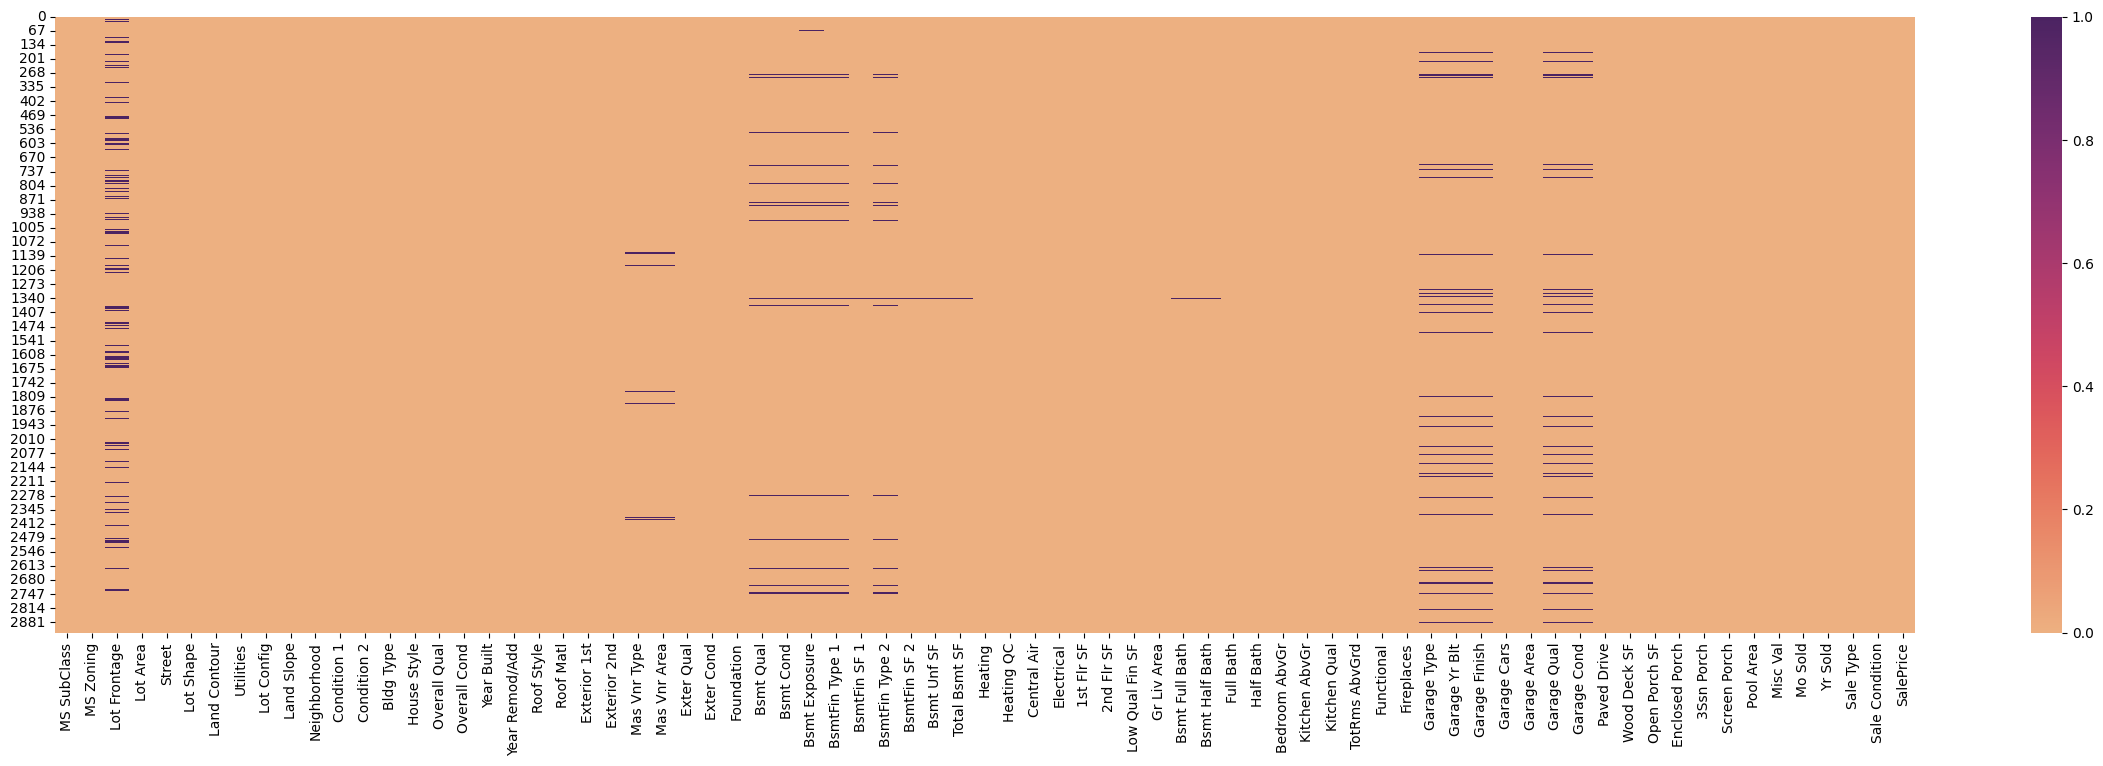

In [7]:
plt.figure(figsize=(30,8))
sb.heatmap(data_cl.isnull(), cmap='flare')
# null count heat map raw data

In [8]:
(data_cl.groupby('Utilities').size()/data_raw['Utilities'].count())*100

Utilities
AllPub    99.897611
NoSeWa     0.034130
NoSewr     0.068259
dtype: float64

In [9]:
data_cl=data_cl.drop(labels=['Utilities'], axis=1)#99% values are same


In [10]:
(data_cl.groupby('Street').size()/data_cl['Street'].count())*100

Street
Grvl     0.409556
Pave    99.590444
dtype: float64

In [11]:
data_cl=data_cl.drop(labels=['Street'], axis=1)#99% values are same


In [12]:
count = data_cl.isnull().sum().sort_values(ascending=False)
per = (data_cl.isnull().sum() / data_cl.isnull().count()*100).sort_values(ascending=False)
null_data = pd.concat([count, per], axis=1, keys=['Count', 'Percent'])
print(null_data.head(15))

                Count    Percent
Lot Frontage      490  16.723549
Garage Cond       159   5.426621
Garage Yr Blt     159   5.426621
Garage Finish     159   5.426621
Garage Qual       159   5.426621
Garage Type       157   5.358362
Bsmt Exposure      83   2.832765
BsmtFin Type 2     81   2.764505
BsmtFin Type 1     80   2.730375
Bsmt Cond          80   2.730375
Bsmt Qual          80   2.730375
Mas Vnr Type       23   0.784983
Mas Vnr Area       23   0.784983
Bsmt Full Bath      2   0.068259
Bsmt Half Bath      2   0.068259


In [13]:
#Filling the numeric data
num_null = ['BsmtFin SF 1',
'BsmtFin SF 2',
'Lot Frontage',
'Bsmt Unf SF',
'Mas Vnr Area',
'Total Bsmt SF',
'Bsmt Full Bath',
'Bsmt Half Bath',
'Garage Area',
'Garage Cars']
for feature in num_null:
    data_cl[feature] = data_cl[feature].fillna(data_cl[feature].mean())


In [14]:
cat_null = ['Exterior 1st',
'Exterior 2nd',
'Sale Type',
'MS Zoning',
'Garage Type',
'Garage Finish',
'Garage Qual',
'Garage Yr Blt',
'Bsmt Exposure',
'Bsmt Half Bath',
'Bsmt Full Bath',
'BsmtFin Type 1',
'Bsmt Cond',
'Bsmt Qual',
'Garage Cond',
'Mas Vnr Type',
'BsmtFin Type 2',
'Electrical',
'Kitchen Qual',
'Functional']
for feature in cat_null:
    data_cl[feature] = data_cl[feature].fillna(data_cl[feature].mode()[0])

In [15]:
count = data_cl.isnull().sum().sort_values(ascending=False)
per = (data_cl.isnull().sum() / data_cl.isnull().count()*100).sort_values(ascending=False)
null_data = pd.concat([count, per], axis=1, keys=['Count', 'Percent'])
print(null_data.head(10))

               Count  Percent
MS SubClass        0      0.0
Central Air        0      0.0
Garage Type        0      0.0
Fireplaces         0      0.0
Functional         0      0.0
TotRms AbvGrd      0      0.0
Kitchen Qual       0      0.0
Kitchen AbvGr      0      0.0
Bedroom AbvGr      0      0.0
Half Bath          0      0.0


<AxesSubplot: >

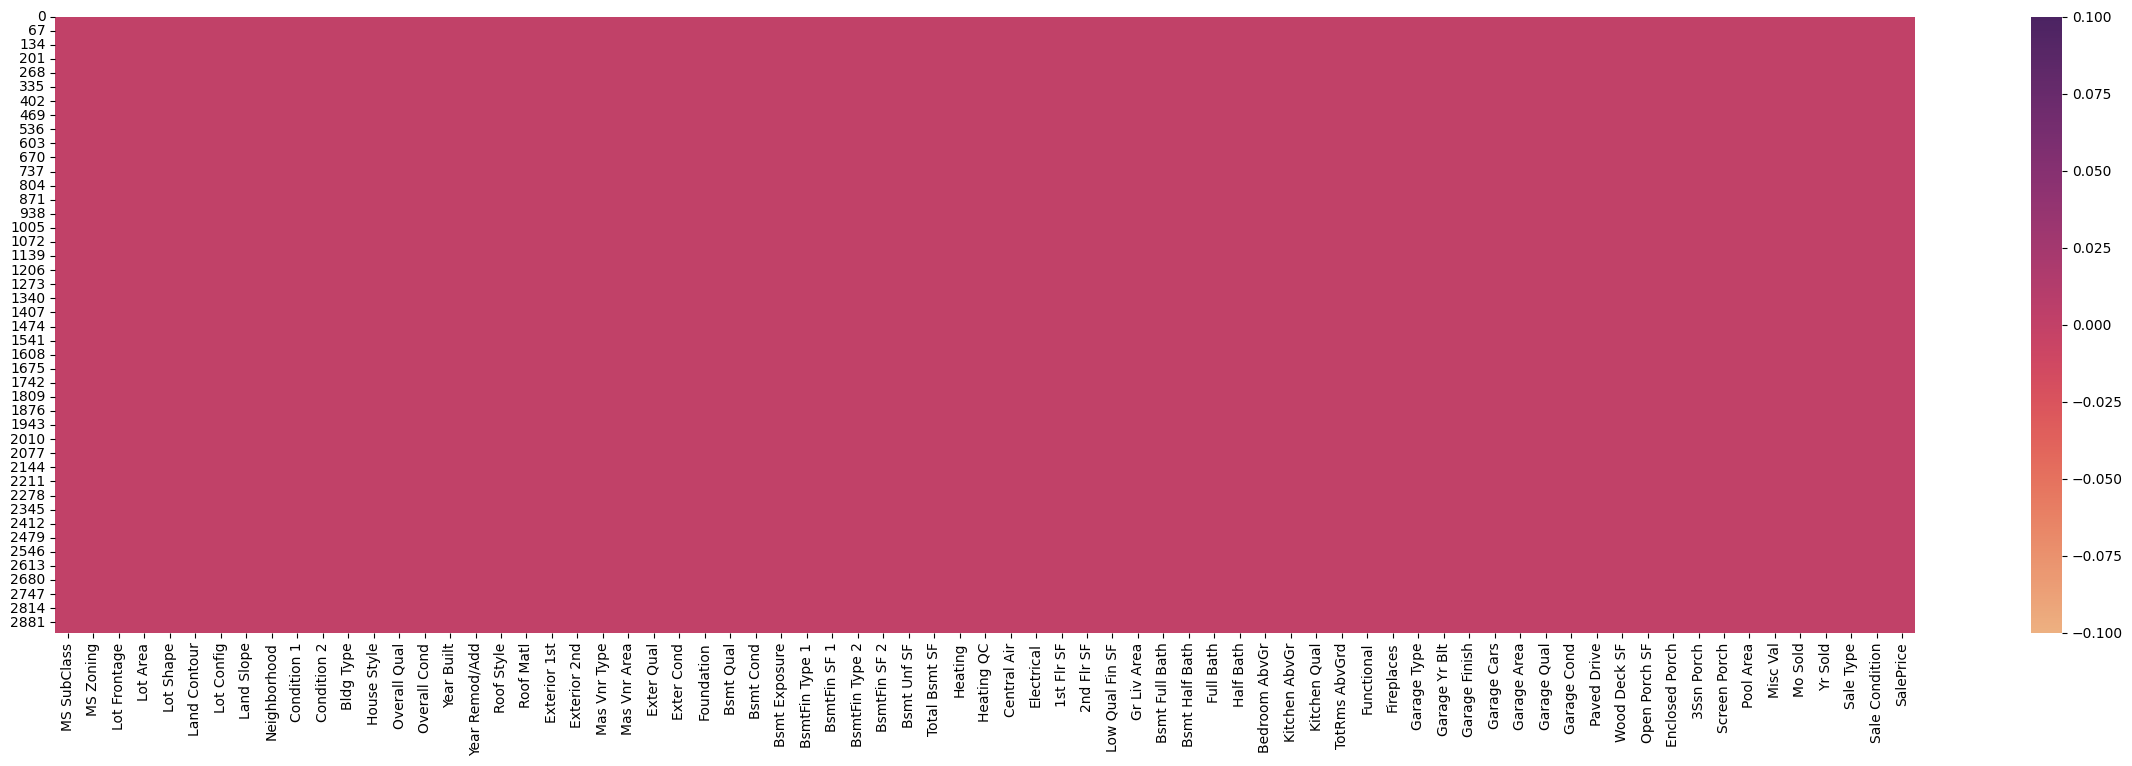

In [16]:
plt.figure(figsize=(30,8))
sb.heatmap(data_cl.isnull(), cmap='flare')
# null count heat map raw data

In [17]:
# data_cl['SalePrice']

In [18]:
# sb.histplot(data=data_cl, x="Misc Val", kde=True)

In [19]:
#data Transformation
cont_cols = data_cl.dtypes[data_cl.dtypes != 'object'].index
skew_cols = data_cl[cont_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_data = skew_cols[abs(skew_cols) > 0.5]
print(skew_data)

Misc Val           21.988523
Pool Area          16.930469
Lot Area           12.814334
Low Qual Fin SF    12.111957
3Ssn Porch         11.397956
Kitchen AbvGr       4.311616
BsmtFin SF 2        4.138564
Enclosed Porch      4.012390
Screen Porch        3.955441
Bsmt Half Bath      3.940121
Mas Vnr Area        2.615927
Open Porch SF       2.534088
Wood Deck SF        1.841735
SalePrice           1.742607
Lot Frontage        1.641697
1st Flr SF          1.468676
BsmtFin SF 1        1.415698
MS SubClass         1.356884
Gr Liv Area         1.273457
Total Bsmt SF       1.155809
Bsmt Unf SF         0.922737
2nd Flr SF          0.866013
TotRms AbvGrd       0.753157
Fireplaces          0.738837
Half Bath           0.697356
Bsmt Full Bath      0.616534
Overall Cond        0.574135
Year Built         -0.604153
dtype: float64


In [20]:
# data_cl['SalePrice']

In [21]:
#data Transformation
for feature in skew_data.index:
    data_cl[feature] = np.log1p(data_cl[feature])

In [22]:
sales_corr=data_cl[data_cl.columns[1:]].corr()['SalePrice'][:-1]
sales_corr.sort_values()

C:\Users\hites\AppData\Local\Temp\ipykernel_36388\1918461171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_corr=data_cl[data_cl.columns[1:]].corr()['SalePrice'][:-1]


Enclosed Porch    -0.220050
Kitchen AbvGr     -0.123708
Low Qual Fin SF   -0.063356
Misc Val          -0.051181
Yr Sold           -0.033131
Bsmt Half Bath    -0.021409
BsmtFin SF 2      -0.020667
Overall Cond       0.001764
Mo Sold            0.038960
3Ssn Porch         0.040973
Pool Area          0.063196
Screen Porch       0.099964
2nd Flr SF         0.133177
Bedroom AbvGr      0.180503
Bsmt Unf SF        0.185021
BsmtFin SF 1       0.243884
Bsmt Full Bath     0.276972
Half Bath          0.311638
Lot Frontage       0.326962
Wood Deck SF       0.353516
Lot Area           0.368499
Total Bsmt SF      0.378429
Mas Vnr Area       0.443864
Garage Yr Blt      0.456071
Open Porch SF      0.462735
TotRms AbvGrd      0.501151
Fireplaces         0.508774
Full Bath          0.577335
Year Remod/Add     0.586153
1st Flr SF         0.613423
Year Built         0.613480
Garage Area        0.651126
Garage Cars        0.675312
Gr Liv Area        0.723164
Overall Qual       0.825645
Name: SalePrice, dty

In [23]:
#data reduction
# Dropping columns having correlation with target variable between -0.01 to 0.01
data_clean=data_cl.drop(labels=['Low Qual Fin SF','Misc Val','Yr Sold','Bsmt Half Bath','BsmtFin SF 2','Overall Cond',\
    'Mo Sold','3Ssn Porch','Pool Area','Screen Porch'], axis=1)

In [24]:
#data Transformation
data_clean['built decade']=pd.cut(data_clean['Year Built'],bins=[1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010\
    ],labels=['1870','1880','1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000'])
data_clean=data_clean.drop(labels=['Year Built'], axis=1)# Not Required anymore

In [25]:
#data Transformation
data_clean['remodel decade']=pd.cut(data_clean['Year Remod/Add'],bins=[1940,1950,1960,1970,1980,1990,2000,2010],labels=['1940','1950','1960','1970','1980','1990','2000'])
data_clean=data_clean.drop(labels=['Year Remod/Add'], axis=1)# Not Required anymore


In [26]:
data_clean['Garage Yr Blt'].mode()

0    2005.0
Name: Garage Yr Blt, dtype: float64

In [27]:

#data Transformation
data_clean['Garage Yr Blt']=data_clean['Garage Yr Blt'].replace(to_replace=2207, value= 2005)#replace outlier with mode
data_clean['Garage Yr Blt'].describe()

count    2930.000000
mean     1979.521502
std        25.217884
min      1895.000000
25%      1962.000000
50%      1983.500000
75%      2003.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [28]:
#data Transformation
data_clean['Garage Yr Blt decade']=pd.cut(data_clean['Garage Yr Blt'],bins=[1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010\
    ],labels=['1890','1900','1910','1920','1930','1940','1950','1960','1970','1980','1990','2000'])
data_clean=data_clean.drop(labels=['Garage Yr Blt'], axis=1)# Not Required anymore

In [29]:
#Converting categorical data to numerical
#data Transformation
data_fin = pd.get_dummies(data_cl)
data_fin.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,F

In [31]:
data_fin.to_csv(r'final.csv',index=False)
